<a href="https://colab.research.google.com/github/kacperkurowski/CE888/blob/master/Assignment%201/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [0]:
import os
import seaborn as sns

##1.Loading Data

In [2]:
os.environ['KAGGLE_USERNAME'] = "kacperkurowski" # username from the json file

os.environ['KAGGLE_KEY'] = "7c927dd985620db03df77b3804e71a95" # key from the json file

!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle

 87% 117M/134M [00:00<00:00, 129MB/s] 
100% 134M/134M [00:00<00:00, 173MB/s]
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


##1.Renaming Files as data downloaded causes overwrite due to same file names

In [3]:
!rename 's/test.csv.zip/test1.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/train1.csv.zip/' train.csv.zip
!ls

test.csv.zip not renamed: test1.csv.zip already exists
train.csv.zip not renamed: train1.csv.zip already exists
sample_submission.csv.zip  test2.csv.zip  train1.csv.zip  train.csv.zip
test1.csv.zip		   test.csv.zip   train2.csv.zip


##1.Removing Files that are not used

In [4]:
!rm sample_submission.csv.zip
!rm -r sample_data
!ls

rm: cannot remove 'sample_data': No such file or directory
test1.csv.zip  test.csv.zip    train2.csv.zip
test2.csv.zip  train1.csv.zip  train.csv.zip


##2.Loading Data

In [5]:
!kaggle competitions download -c santander-customer-transaction-prediction # api copied from kaggle

  0% 0.00/462k [00:00<?, ?B/s]
100% 462k/462k [00:00<00:00, 69.5MB/s]
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


##2.Renaming Files as data downloaded causes overwrite due to same file names

In [6]:
!rename 's/test.csv.zip/test2.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/train2.csv.zip/' train.csv.zip
!ls

test.csv.zip not renamed: test2.csv.zip already exists
train.csv.zip not renamed: train2.csv.zip already exists
sample_submission.csv.zip  test2.csv.zip  train1.csv.zip  train.csv.zip
test1.csv.zip		   test.csv.zip   train2.csv.zip


##2.Removing Files that are not used

In [7]:
!rm sample_submission.csv.zip
!ls

test1.csv.zip  test.csv.zip    train2.csv.zip
test2.csv.zip  train1.csv.zip  train.csv.zip


##Loading the files

In [8]:
import pandas as pd

df_test1 = pd.read_csv("test1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_test1)

df_test2 = pd.read_csv("test2.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_test2)

df_train1 = pd.read_csv("train1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_train1)

df_train2 = pd.read_csv("train2.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_train2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                        MachineIdentifier  ... Wdft_RegionIdentifier
0        0000010489e3af074adeac69c53e555e  ...                   7.0
1        00000176ac758d54827acd545b6315a5  ...                  12.0
2        0000019dcefc128c2d4387c1273dae1d  ...                  11.0
3        0000055553dc51b1295785415f1a224d  ...                  10.0
4        00000574cefffeca83ec8adf9285b2bf  ...                   3.0
...                                   ...  ...                   ...
7853248  fffff8c0e065c468a2373f7afd5e7674  ...                  10.0
7853249  fffff90b27a1248b6fffc7a535bd736c  ...                  11.0
7853250  fffffa6a956c17ddbabca53d4ab708ae  ...                   7.0
7853251  fffffad7b6c8196ec5cae634406c0d4f  ...                  11.0
7853252  fffffbd305a90eb0f93ee4f30a39c736  ...                  10.0

[7853253 rows x 82 columns]
            ID_code    var_0    var_1  ...  var_197  var_198  var_199
0            test_0  11.0656   7.7798  ...  10.7200  15.4722  -8.7197
1  

##Plotting Histogram of Microsoft-Malware-Prediction Train Data

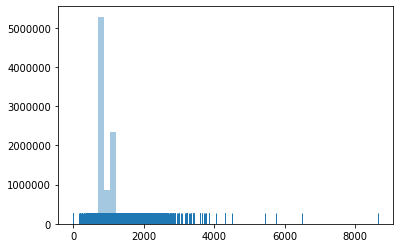

In [13]:
y_df = df_train1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Microsoft-Malware-Prediction Test Data

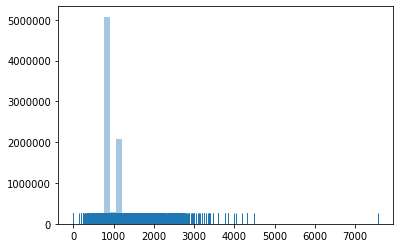

In [14]:
y_df = df_test1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Santander-Customer-Transaction-Prediction Train Data

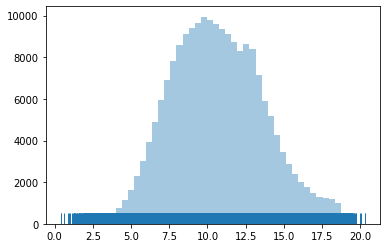

In [16]:
y_df = df_train2["var_0"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Santander-Customer-Transaction-Prediction Test Data

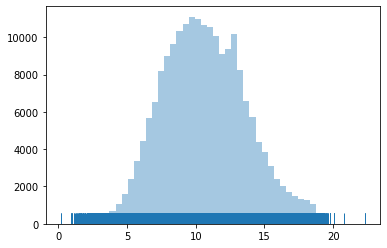

In [17]:
y_df = df_test2["var_0"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)